Dimensões: (4394, 9)


,goods-title-link--jump,goods-title-link--jump href,rank-title,rank-sub,price,discount,selling_proposition,color-count,goods-title-link
0,10pcs Random Color Data Cable Organizer,https://us.shein.com/10pcs-Random-Color-Data-C...,#10 Best Sellers,in Cable Storage,$1.36,-20%,NaN,NaN,NaN
1,3pcs Anti Glare Tempered Glass Front Film Phon...,https://us.shein.com/3pcs-Anti-Glare-Tempered-...,#1 Best Sellers,in Screen Protectors,$2.32,-20%,NaN,NaN,NaN
2,"Universal Waterproof Phone Pouch, Waterproof P...",https://us.shein.com/Universal-Waterproof-Phon...,NaN,NaN,$1.70,NaN,600+ sold recently,NaN,NaN
3,"Silicone Phone Suction Cup, 24PCS Universal Su...",https://us.shein.com/Silicone-Phone-Suction-Cu...,#5 Best Sellers,in Adhesive Cardholders,$0.38,-71%,NaN,8.0,NaN
4,Customized Phone Case Compatible With Iphone 1...,https://us.shein.com/Customized-Phone-Case-Com...,#9 Best Sellers,in Customized Phone Cases,$3.10,NaN,NaN,7.0,NaN



Colunas: ['goods-title-link--jump', 'goods-title-link--jump href', 'rank-title', 'rank-sub', 'price', 'discount', 'selling_proposition', 'color-count', 'goods-title-link']

--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4394 entries, 0 to 4393
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   goods-title-link--jump       38 non-null     object 
 1   goods-title-link--jump href  38 non-null     object 
 2   rank-title                   747 non-null    object 
 3   rank-sub                     747 non-null    object 
 4   price                        4394 non-null   object 
 5   discount                     1525 non-null   object 
 6   selling_proposition          3167 non-null   object 
 7   color-count                  1138 non-null   float64
 8   goods-title-link             4356 non-null   object 
dtypes: float64(1), object(8)
memory usage: 309.1+ KB
None

--- Missi

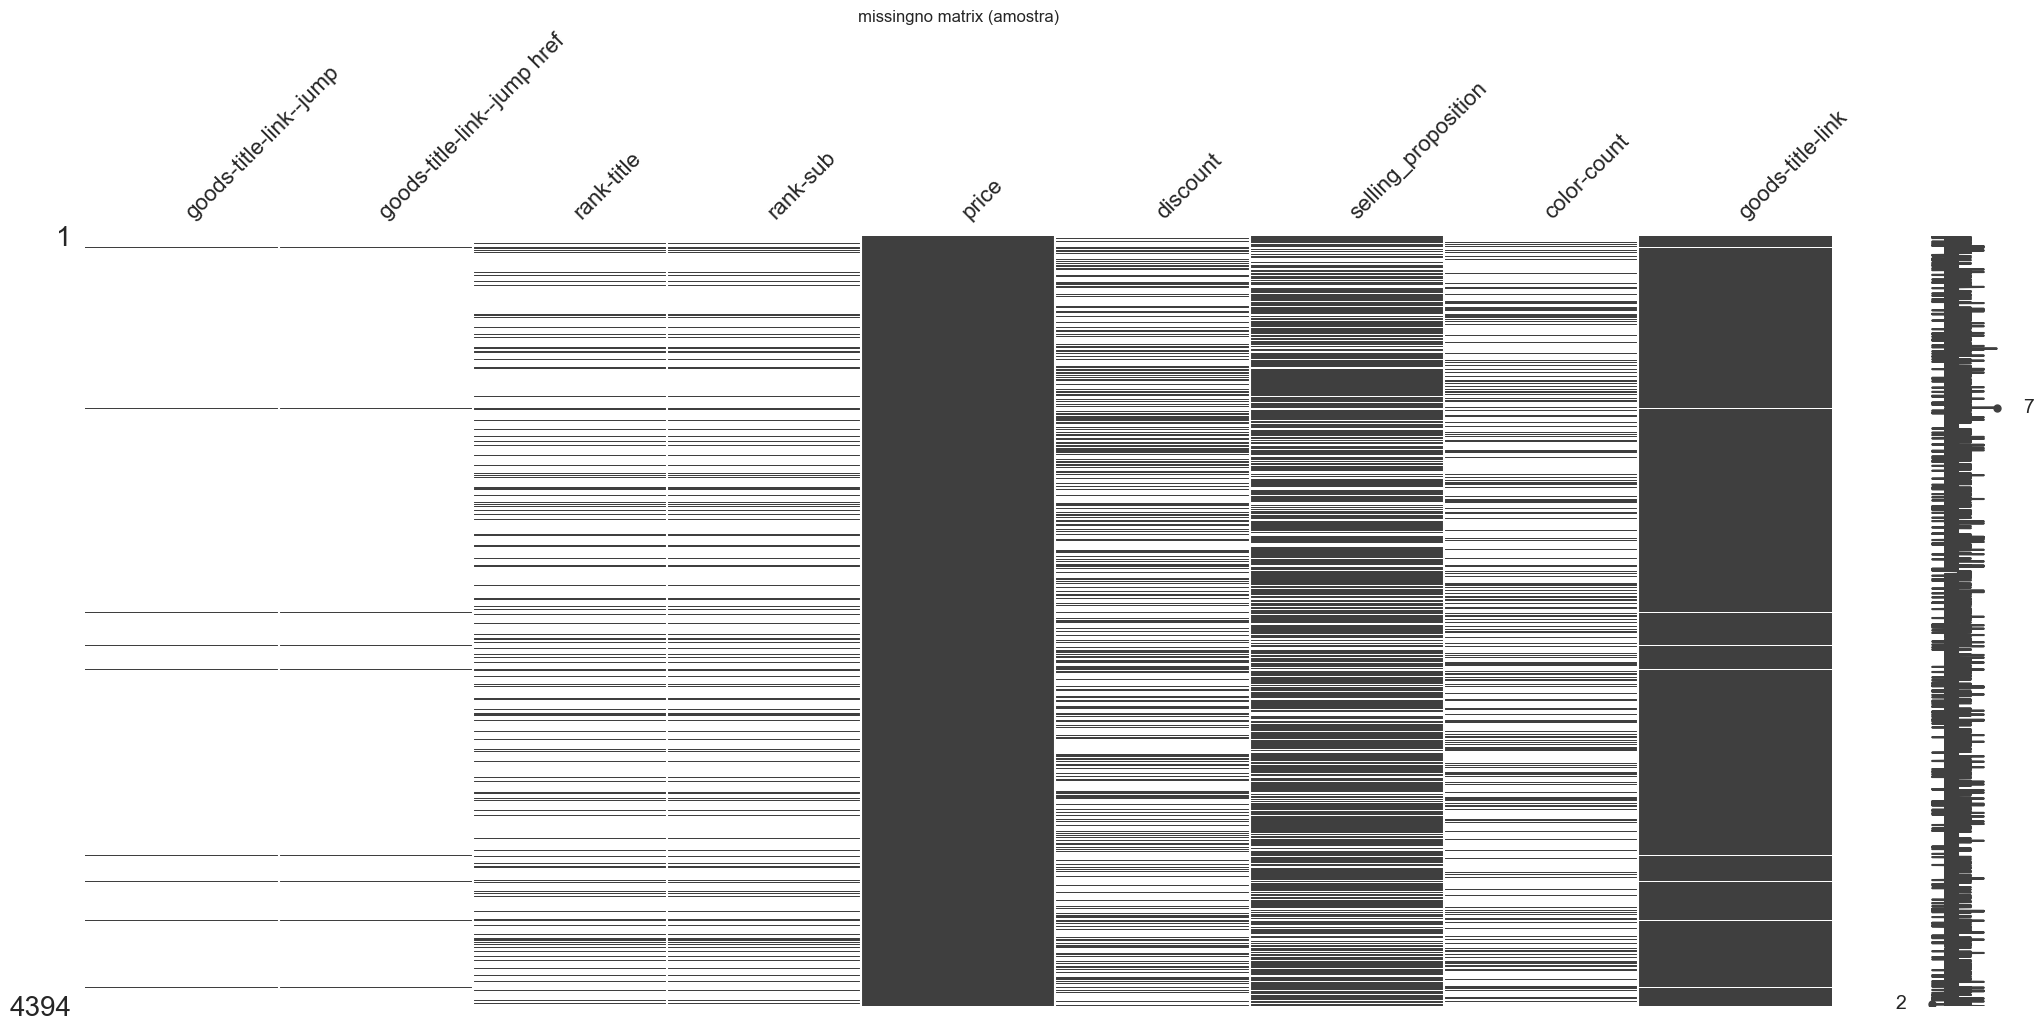


Numéricas: ['color-count']
Objetos/texto: ['goods-title-link--jump', 'goods-title-link--jump href', 'rank-title', 'rank-sub', 'price', 'discount', 'selling_proposition', 'goods-title-link']


In [4]:
# Limpeza e análise adaptada para: us-shein-electronics-4395.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats

sns.set(style="whitegrid")
pd.set_option('display.max_columns', 200)

FILE = "us-shein-electronics-4395.csv"

# Carregar e inspecionar
df_orig = pd.read_csv(FILE)
print("Dimensões:", df_orig.shape)
display(df_orig.head())
print("\nColunas:", df_orig.columns.tolist())

# sumarizar tipos e missing
print("\n--- INFO ---")
print(df_orig.info())
print("\n--- Missing counts ---")
print(df_orig.isnull().sum().sort_values(ascending=False).head(30))

# amostra visual do missing pattern (pode demorar se for muito grande)
try:
    msno.matrix(df_orig.sample(n=min(5000, len(df_orig)), random_state=1))
    plt.title("missingno matrix (amostra)")
    plt.show()
except Exception:
    pass

# detectar automaticamente tipos
numeric_cols = df_orig.select_dtypes(include=['int64','float64']).columns.tolist()
object_cols = df_orig.select_dtypes(include=['object']).columns.tolist()
print("\nNuméricas:", numeric_cols)
print("Objetos/texto:", object_cols)

In [5]:
# 2) Preservar cópia original
df = df_orig.copy()


In [6]:
# Tratamento de valores ausentes (heurística)

# Numéricos -> mediana
for c in numeric_cols:
    median = df[c].median()
    df[c] = df[c].fillna(median)

# Texto -> moda / 'missing'
for c in object_cols:
    try:
        mode = df[c].mode(dropna=True)[0]
        df[c] = df[c].fillna(mode)
    except Exception:
        df[c] = df[c].fillna("missing")

print("\nMissing após imputação (deve reduzir a zero onde aplicável):")
print(df.isnull().sum().sort_values(ascending=False).head(30))



Missing após imputação (deve reduzir a zero onde aplicável):
goods-title-link--jump         0
goods-title-link--jump href    0
rank-title                     0
rank-sub                       0
price                          0
discount                       0
selling_proposition            0
color-count                    0
goods-title-link               0
dtype: int64


In [7]:
# 4) Remover duplicatas
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f"\nDuplicatas removidas: {before-after}")

# se houver uma coluna id do produto, considere deduplicar por subset:
# if 'product_id' in df.columns: df = df.drop_duplicates(subset=['product_id'])



Duplicatas removidas: 36


In [8]:
#  Padronizar textos e tentar converter datas
# texto: strip + lower + collapse espaços
for c in object_cols:
    df[c] = df[c].astype(str).str.strip().str.lower().str.replace(r'\s+', ' ', regex=True)

# detectar colunas que provavelmente são datas
date_candidates = [c for c in df.columns if ('date' in c.lower()) or ('time' in c.lower()) or ('created' in c.lower())]
print("\nColunas candidatas a data:", date_candidates)
for c in date_candidates:
    df[c] = pd.to_datetime(df[c], errors='coerce', dayfirst=False)



Colunas candidatas a data: []



Estatísticas (originais) — primeiras 5 colunas numéricas:


,count,mean,std,min,25%,50%,75%,max
color-count,4358.0,5.386645,1.937129,4.0,5.0,5.0,5.0,31.0



Estatísticas (após capping):


,count,mean,std,min,25%,50%,75%,max
color-count,4358.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0


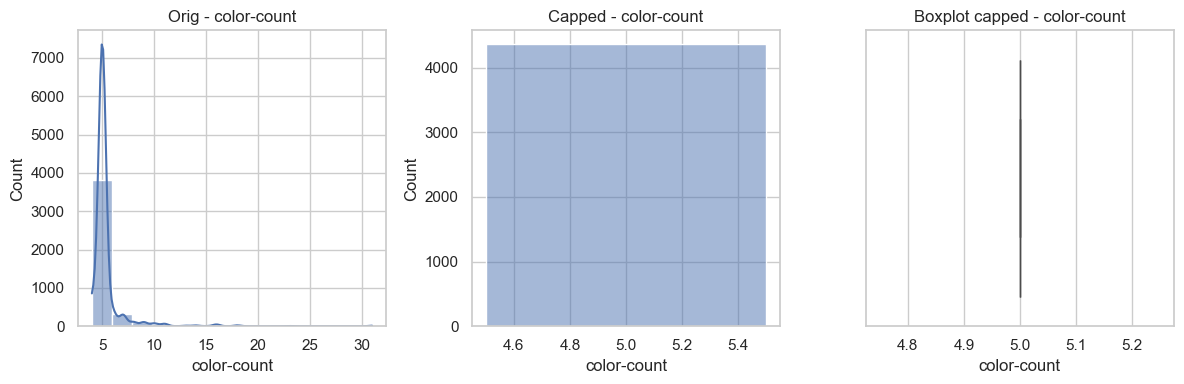

In [9]:
# Detectar outliers com IQR e oferecer 3 estratégias (capping usada por padrão)
# ------------------------
def iqr_bounds(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return lower, upper

def treat_outliers(df_in, numeric_cols, method='capping'):
    df_out = df_in.copy()
    for c in numeric_cols:
        ser = df_out[c].dropna()
        if ser.empty:
            continue
        lower, upper = iqr_bounds(ser)
        if method == 'remove':
            df_out = df_out[~((df_out[c] < lower) | (df_out[c] > upper))]
        elif method == 'capping':
            df_out[c] = np.where(df_out[c] < lower, lower, np.where(df_out[c] > upper, upper, df_out[c]))
        elif method == 'log':
            # aplica log1p (ajusta valores não positivos)
            if (df_out[c] > 0).all():
                df_out[c] = np.log1p(df_out[c])
            else:
                shift = 1 - df_out[c].min()
                df_out[c] = np.log1p(df_out[c] + shift)
        else:
            raise ValueError("method deve ser 'remove','capping' ou 'log'")
    return df_out

# aplicar capping por padrão
df_capped = treat_outliers(df, numeric_cols, method='capping')

# mostrar mudanças em estatísticas
print("\nEstatísticas (originais) — primeiras 5 colunas numéricas:")
display(df[numeric_cols[:5]].describe().T)
print("\nEstatísticas (após capping):")
display(df_capped[numeric_cols[:5]].describe().T)

# visualizar antes/depois para até 3 colunas numéricas
for c in numeric_cols[:3]:
    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1)
    sns.histplot(df[c].dropna(), kde=True)
    plt.title(f"Orig - {c}")
    plt.subplot(1,3,2)
    sns.histplot(df_capped[c].dropna(), kde=True)
    plt.title(f"Capped - {c}")
    plt.subplot(1,3,3)
    sns.boxplot(x=df_capped[c].dropna())
    plt.title(f"Boxplot capped - {c}")
    plt.tight_layout()
    plt.show()

In [10]:
# Criar features úteis (exemplos adaptáveis ao dataset de eletrônicos)
# ------------------------
df_features = df_capped.copy()

# Exemplo: se houver price, rating, reviews, brand, title
if 'price' in df_features.columns:
    df_features['price'] = pd.to_numeric(df_features['price'], errors='coerce')
if 'original_price' in df_features.columns:
    df_features['original_price'] = pd.to_numeric(df_features['original_price'], errors='coerce')

# discount_pct
if 'price' in df_features.columns and 'original_price' in df_features.columns:
    df_features['discount_pct'] = np.where(df_features['original_price'] > 0,
                                           (df_features['original_price'] - df_features['price']) / df_features['original_price'],
                                           0)

# title length (se existir coluna title/name)
for candidate in ['title','name','product_name']:
    if candidate in df_features.columns:
        df_features['title_length'] = df_features[candidate].astype(str).str.len()
        break

# price per char
if 'price' in df_features.columns and 'title_length' in df_features.columns:
    df_features['price_per_char'] = df_features['price'] / (df_features['title_length'] + 1)

# created_month / weekday a partir da primeira coluna de data detectada
if len(date_candidates) > 0:
    dtcol = date_candidates[0]
    if pd.api.types.is_datetime64_any_dtype(df_features[dtcol]):
        df_features['created_month'] = df_features[dtcol].dt.month
        df_features['created_weekday'] = df_features[dtcol].dt.weekday


In [11]:
#  Comparar qualidade e salvar
# ------------------------
def quality_summary(df_in):
    return {
        'rows': len(df_in),
        'cols': df_in.shape[1],
        'missing_total': int(df_in.isnull().sum().sum()),
        'duplicated_rows': int(df_in.duplicated().sum())
    }

print("\nQuality original:", quality_summary(df_orig))
print("Quality limpo:", quality_summary(df_features))

OUTFILE = FILE.replace('.csv','_cleaned.csv')
df_features.to_csv(OUTFILE, index=False)
print(f"\nArquivo salvo: {OUTFILE}")



Quality original: {'rows': 4394, 'cols': 9, 'missing_total': 23396, 'duplicated_rows': 34}
Quality limpo: {'rows': 4358, 'cols': 9, 'missing_total': 4358, 'duplicated_rows': 56}

Arquivo salvo: us-shein-electronics-4395_cleaned.csv
